In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating new project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders

In [3]:
using Plots

In [4]:
r_min::Float64=-5.0;
r_max::Float64=5.0;
Z::Int64=1;
N::Int64=10000;
w::Float64=1;
m::Float64=1;


In [5]:
#grid= ses.Grids.exponential_grid(r_max, Z);
grid= Grids.uniform_grid(r_min, r_max, N);

In [6]:

harm_osci0::Vector{Float64}= exp.(-0.5.*abs.(grid).^2);
harm_osci0= MathUtils.normalize!(harm_osci0, grid);

harm_osci1::Vector{Float64}= 2*grid.*harm_osci0;
harm_osci1= MathUtils.normalize!(harm_osci1, grid);

harm_osci2::Vector{Float64}= (4*grid.^2 .- 2).*harm_osci0;
harm_osci2= MathUtils.normalize!(harm_osci2, grid);

harm_osci3::Vector{Float64}= (8*grid.^3 .- 12*grid).*harm_osci0;
harm_osci3= MathUtils.normalize!(harm_osci3, grid);

In [7]:


v_harm= Potentials.harmoic_oscilator_potential(w, m, grid);
v_effe= v_harm;

In [8]:
E_plus::Float64=0.3;
E_minu::Float64=0.2;
E_c::Float64= 0.5000;
E_N::Int64=20;
E_grid= Grids.uniform_grid((E_c - E_minu), (E_c + E_plus), E_N);

In [9]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.harmoic_oscillator);

UndefVarError: UndefVarError: E_grid not defined

In [9]:
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.harmoic_oscillator(grid);

In [10]:
typeof(InitialConditions.harmoic_oscillator)

typeof(Main.SchrodingerEquationSolver.InitialConditions.harmoic_oscillator) (singleton type of function harmoic_oscillator, subtype of Function)

In [11]:
E_plus::Float64=0.3;
E_minu::Float64=0.2;
E_c::Float64= 0.5000;
E_N::Int64=20;
E_grid= Grids.uniform_grid((E_c - E_minu), (E_c + E_plus), E_N);

In [12]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end

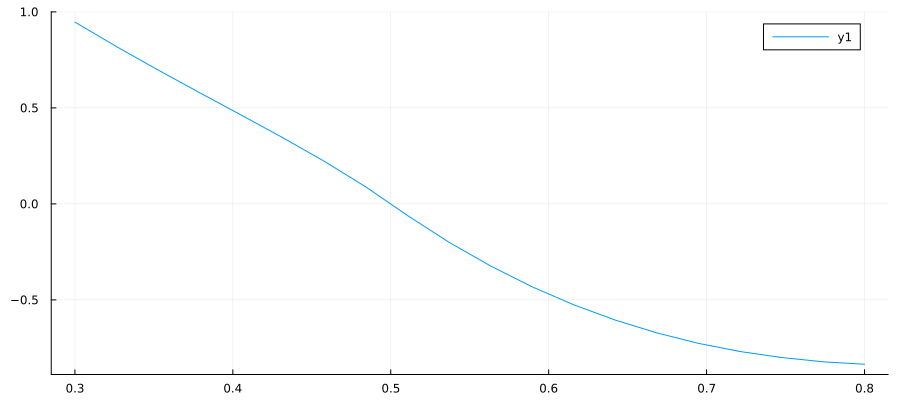

In [13]:
plot(E_grid, [merg_valu_of_E])
plot!(size=(900,400))

In [14]:
ener_indx= MathUtils.indices_of_zeros_finder(merg_valu_of_E);

In [17]:
typeof(ener_indx)

Vector{Int64} (alias for Array{Int64, 1})

In [15]:
merg_valu_of_E[ener_indx[1]]

0.08831412068297839

In [16]:
merg_valu_of_E[ener_indx[1]+1]

-0.06029008292940108

In [9]:
E::Float64= 0.5000;
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.harmoic_oscillator(grid);

In [10]:
u_merged, merge_value= odses.solver(E,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
                                    init_valu2_bwrd, v_effe, grid);

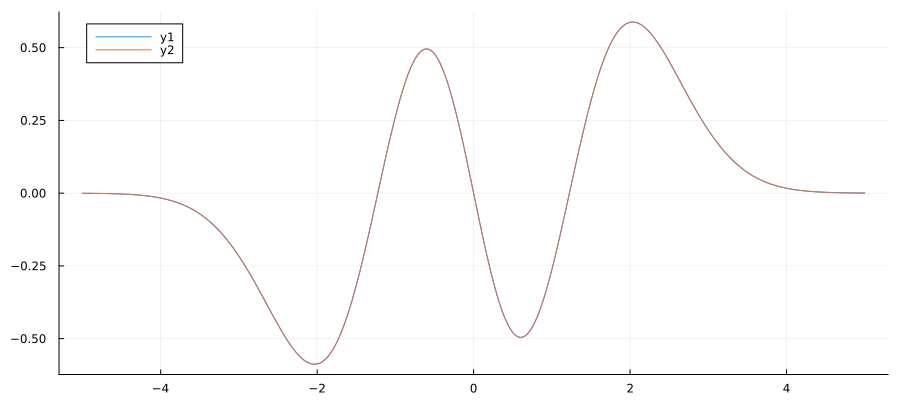

In [11]:
plot(grid, [u_merged, harm_osci3])
plot!(size=(900,400))

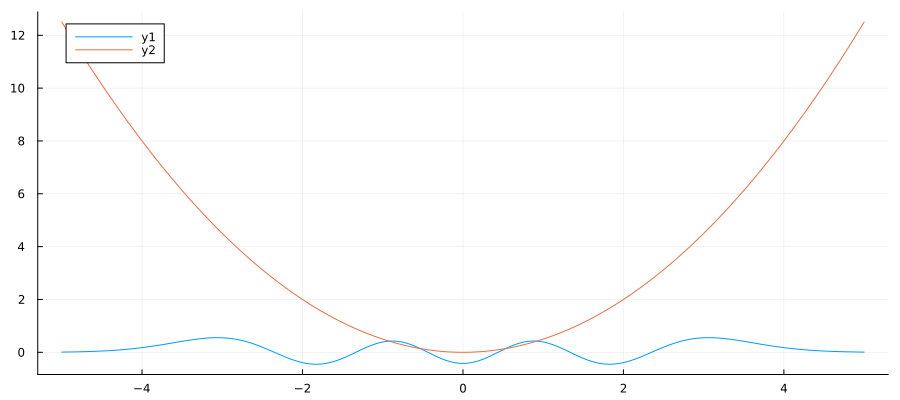

In [24]:
plot(grid, [u_merged, v_effe])
plot!(size=(900,400))

In [8]:
E::Float64= -0.125000;
l::Int64=0;

v_angu= Potentials.angular_potential(l, grid);

init_valu1_fwrd::Float64=grid[1]^(l+1.0)#u_s1_hydr_norm[1];
init_valu2_fwrd::Float64=grid[2]^(l+1.0) #u_s1_hydr_norm[2];
if sign(E) < 0.0
    lambda= (-2.0*E)^0.5;
else
    lambda= (2.0*E)^0.5;
end
init_valu1_bwrd::Float64=grid[end]*exp(-1.0*lambda*grid[end]);#u_s1_hydr_norm[end];
init_valu2_bwrd::Float64=grid[end-1]*exp(-1.0*lambda*grid[end-1]);#u_s1_hydr_norm[end-1];
v_effe= v_colu + v_angu;



In [9]:
u_merged, merge_value= odses.solver(E,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
                                    init_valu2_bwrd, v_effe, grid);

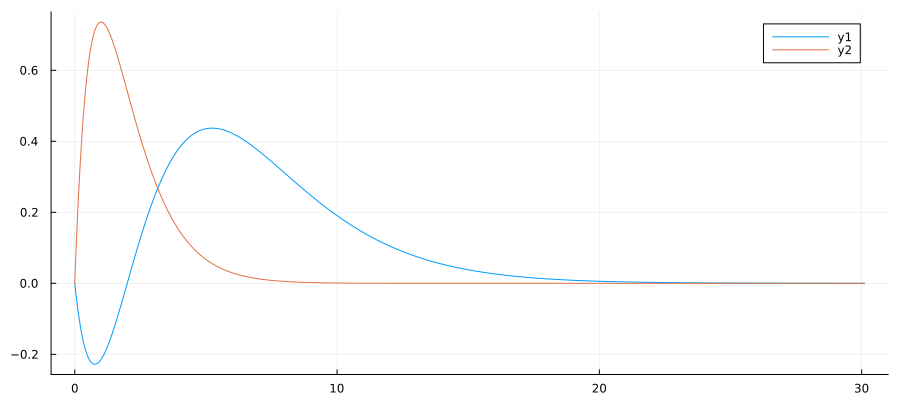

In [10]:
plot(grid, [u_merged, u_s1_hydr_norm])
plot!(size=(900,400))

In [12]:
temp= ((u_merged .- u_s1_hydr_norm).^2).^0.5;
sum(temp)/length(temp)

1.1920803723996946e-7

In [12]:
temp= ((u_merged .- u_s1_hydr_norm).^2).^0.5;
sum(temp)/length(temp)

1.5030983009662665e-7

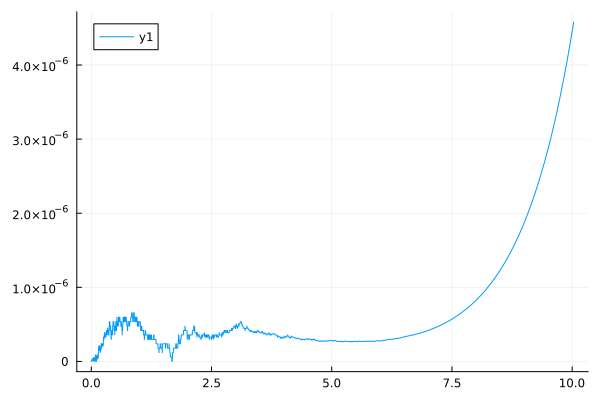

In [12]:
plot(grid, ((u_merged .- u_s1_hydr_norm).^2).^0.5)

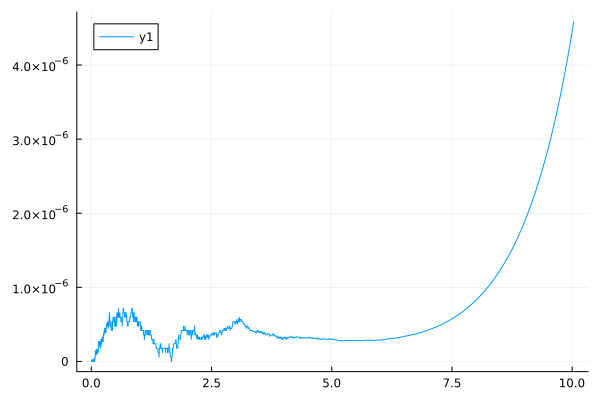

In [20]:
plot(grid, ((u_merged .- u_s1_hydr_norm).^2).^0.5)

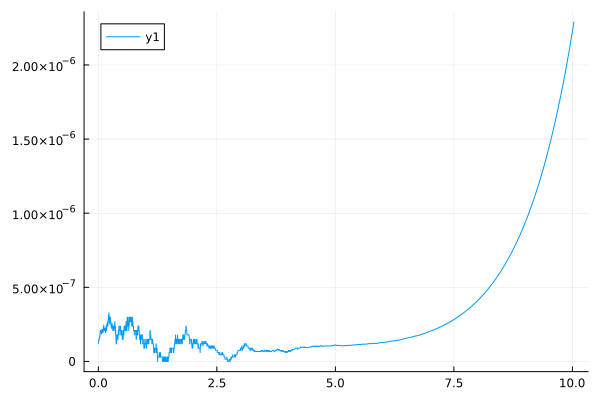

In [25]:
plot(grid, ((u_bwd .- u_s1_hydr).^2).^0.5)

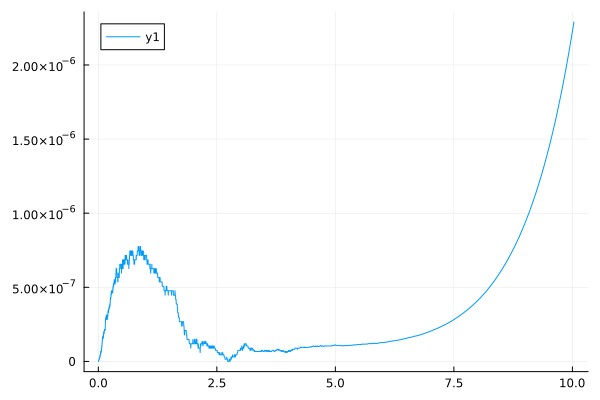

In [26]:
plot(grid, ((u_merged .- u_s1_hydr).^2).^0.5)

In [28]:
temp= ((u_merged .- u_s1_hydr).^2).^0.5;
sum(temp)/length(temp)

In [33]:
sum(temp)/length(temp)

1.3244958244185126e-7

In [34]:
sum(temp)/length(temp) < 1.325e-7

true

In [ ]:
include("tests/tests_u_s1_hydrogen")

In [31]:
#parameters needed to solve equation
E= -0.5000;
l=0;
v_effe= v_colu;
y_1=u_s1_hydr[1];#grid[1]^(l+1.0)
y_2=u_s1_hydr[2];#grid[2]^(l+1.0)
grid=grid;
g0=zeros(Float64, 6)
g1=zeros(Float64, 6)
f0=ones(Float64, 6)
f1= 2.0.*(v_effe .- E);

N=size(v_effe)[1];

y0=zeros(Float64, N);#solution to differential equation
y1=zeros(Float64, N);#first derivative of solution to differential equation
y0[1]= y_1;
y1[1]= (y_2 - y_1)/(grid[2]-grid[1]);

for i in 1:4
#for i in 1:(N-1)
    h= grid[i+1] - grid[i];
    y0[i+1], y1[i+1]= IntegralNumericalMethods.RK4(g1,f1[i:i+1],y0[i], y1[i],h);
end
#integration loop using prediction correction adams moulton degree 5
for i in 6:N
    h= grid[i] - grid[i-1];
    y0[i], y1[i]= IntegralNumericalMethods.PCABM5(g1,f1[i-5:i],
                                            y0[i-5:i-1], y1[i-5:i-1],h);
end

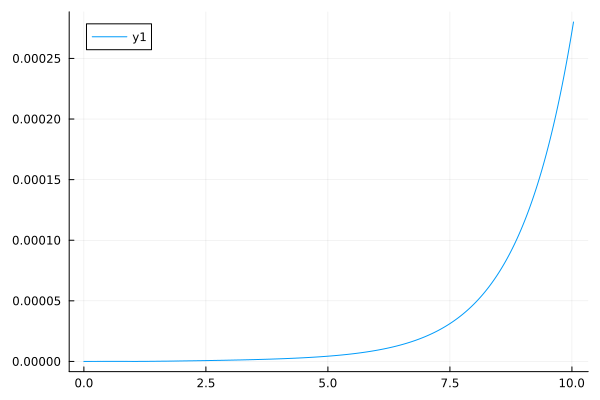

In [32]:
plot(grid, ((y0 .- u_s1_hydr).^2).^0.5)

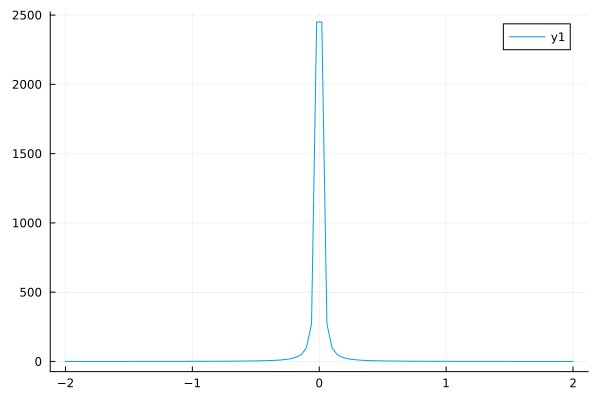

In [5]:
plot(unif_grid, v_angu)

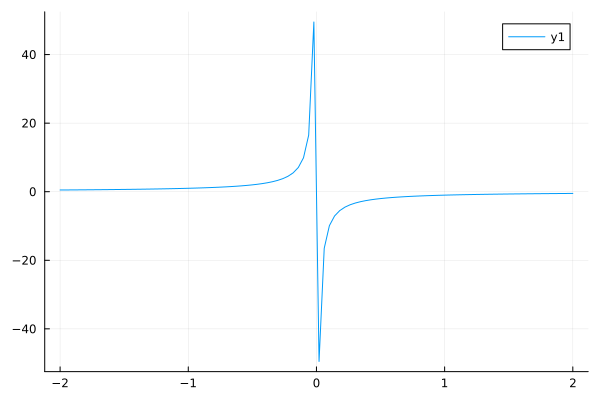

In [6]:
plot(unif_grid, v_colu)

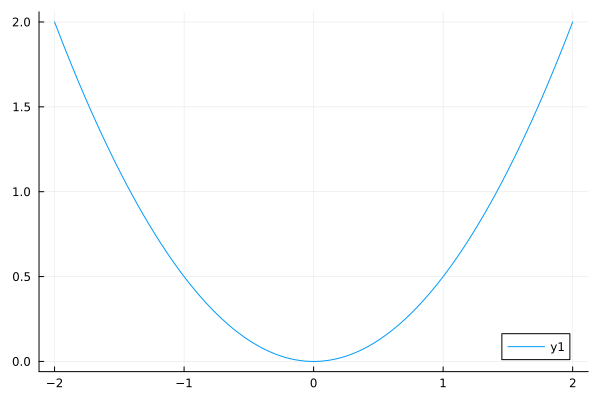

In [7]:
plot(unif_grid, v_harm)